 # Premier Neurone 

In [413]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


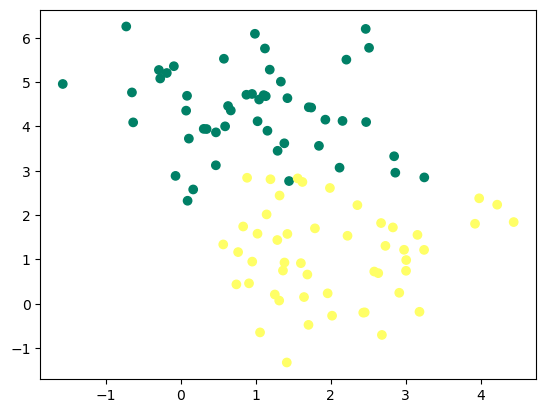

In [414]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# 2. Fonctions du modele

## 2.1 initialisation

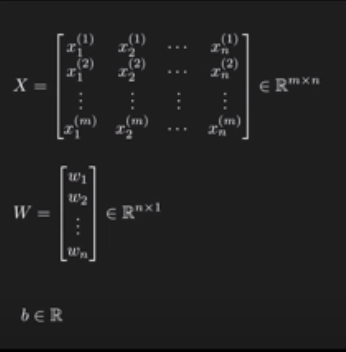

In [415]:
from IPython.display import Image

# Remplacez 'gradient.png' par le chemin de votre image
Image(filename='initial.png', width=300)

In [416]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [417]:
w,b=initilisation(X)
w.shape

(2, 1)

## 2.2 model

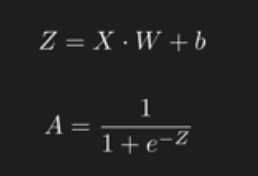

In [418]:
from IPython.display import Image

# Remplacez 'gradient.png' par le chemin de votre image
Image(filename='model.png', width=250)

In [419]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [420]:
A=model(X,w,b)

## 2.3 Fuction log_loss

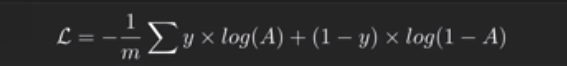

In [421]:
from IPython.display import Image

# Remplacez 'gradient.png' par le chemin de votre image
Image(filename='log_loss.png', width=500)

In [422]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

## 2.4.Function gradient

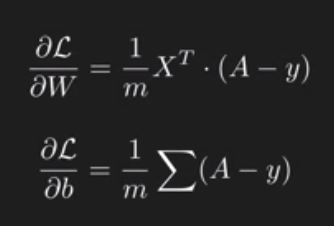

In [423]:
from IPython.display import Image

# Remplacez 'gradient.png' par le chemin de votre image
Image(filename='gradient.png', width=250)



In [424]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [425]:
dw,db= gradients(A,X,y)

## 2.5 update

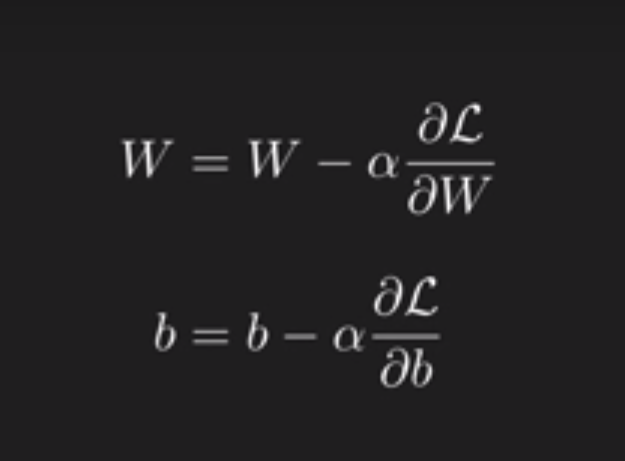

In [426]:
from IPython.display import Image

# Remplacez 'gradient.png' par le chemin de votre image
Image(filename='update.png', width=250)


In [427]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [428]:
from sklearn.metrics import accuracy_score

In [429]:
def predict(X, W, b):
    A = model(X, W, b)
    print(A)
    return A >= 0.5

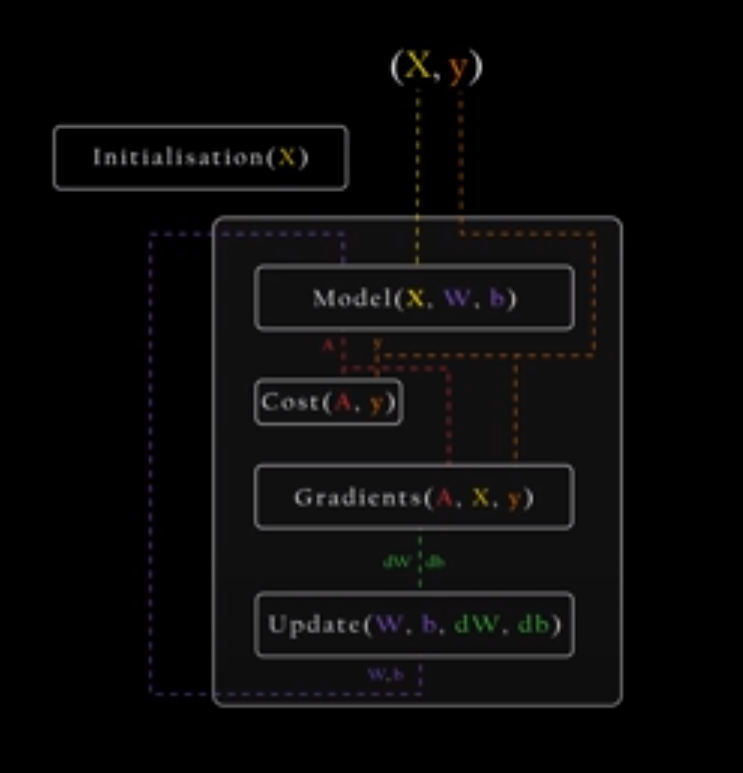

In [430]:
from IPython.display import Image

# Remplacez 'gradient.png' par le chemin de votre image
Image(filename='f.png', width=350)

In [431]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)

[[0.9768465 ]
 [0.64294281]
 [0.00563311]
 [0.09780762]
 [0.96271535]
 [0.33517131]
 [0.07780877]
 [0.96348428]
 [0.04796113]
 [0.78589935]
 [0.03434507]
 [0.82088836]
 [0.03672755]
 [0.01726764]
 [0.67878333]
 [0.98788558]
 [0.98781191]
 [0.03408905]
 [0.59123293]
 [0.56584619]
 [0.05650578]
 [0.03930824]
 [0.35970534]
 [0.00572449]
 [0.93902823]
 [0.03872574]
 [0.81826551]
 [0.01389819]
 [0.0859363 ]
 [0.74900201]
 [0.96587693]
 [0.05342616]
 [0.55419557]
 [0.96660488]
 [0.39824425]
 [0.29645893]
 [0.70023808]
 [0.5572278 ]
 [0.50239062]
 [0.33736857]
 [0.04996079]
 [0.14020611]
 [0.00105416]
 [0.17862828]
 [0.17542581]
 [0.81983563]
 [0.94327729]
 [0.92723916]
 [0.00434719]
 [0.01268117]
 [0.9073788 ]
 [0.44019247]
 [0.095089  ]
 [0.05637525]
 [0.85984059]
 [0.05334249]
 [0.76297132]
 [0.76366825]
 [0.94628515]
 [0.98433801]
 [0.58298994]
 [0.22876283]
 [0.00571939]
 [0.91956148]
 [0.02232691]
 [0.36050976]
 [0.03126668]
 [0.69428672]
 [0.94411792]
 [0.30649127]
 [0.18187909]
 [0.87

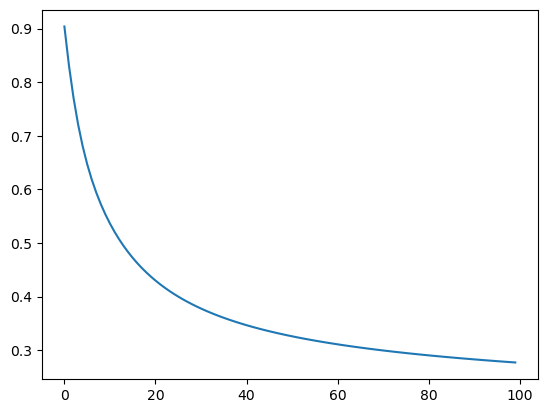

In [432]:
W, b = artificial_neuron(X, y)

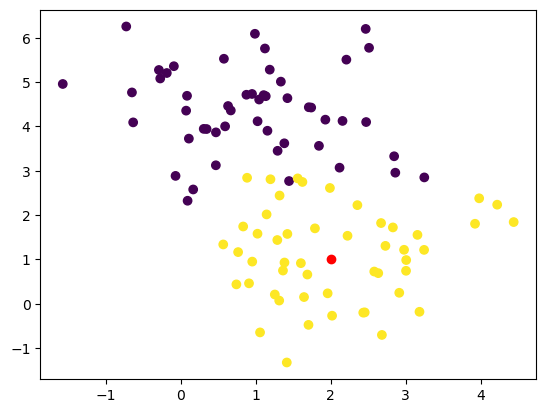

[0.86999825]


array([ True])

In [433]:
new_plant =np.array([2,1])

plt.scatter(X[:,0], X[:, 1], c=y)
plt.scatter(new_plant[0],new_plant[1], c='r')
plt.show()
predict(new_plant, w, b)

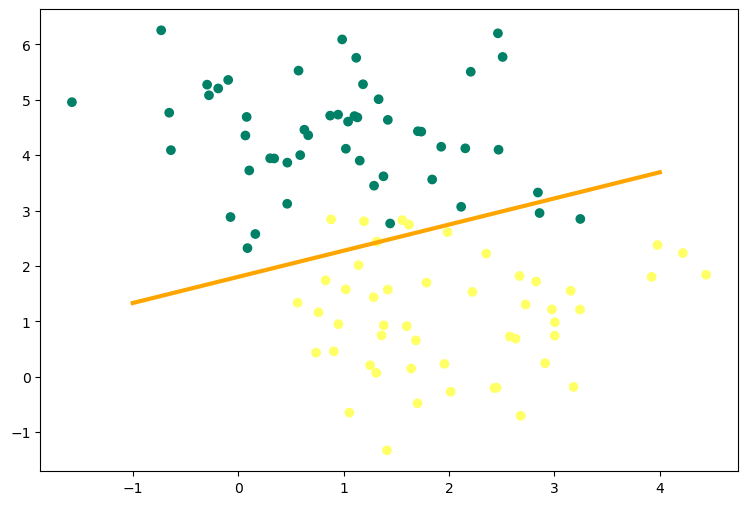

In [412]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='orange', lw=3)